In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [14]:
# DELIVERABLES
# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

In [15]:
# Import your data into a Pandas DataFrame.
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [16]:
# Read the data frame city data
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [25]:
# get info on dataframe
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [26]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [31]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [32]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [33]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="SubUrban")

0

In [34]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [17]:
# Check for null Values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [18]:
# Read the data frame ride data
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [35]:
# get info
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [7]:
# Check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [37]:
# get info
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [41]:
# Merge your DataFrames. how=left
pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
# Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [80]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# Read urban_cities_df dataframe
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [79]:
# Create the urban ride count.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the suburban ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the rural ride count.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [78]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [48]:
# # Merge your DataFrames.how=right
# pyber_data_right_df = pd.merge(city_data_df,ride_data_df,how="right",on=["city","city"])
# pyber_data_right_df.head()

In [86]:
# Next, we'll use the groupby() function on the city type DataFrames to get the average fare for each city type. This will be our second dataset.
#  we need to get the average fare for each city under each type
urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the suburban cities.
suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the rural cities.
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]
# Read the series
urban_avg_fare.head()
# pyber_mean_fare_df = pyber_data_df.groupby(["city"]).mean(["fare"])
# pyber_mean_fare_df

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [90]:
# Now we have two of three datasets we need to create a bubble chart.
#  Next, we'll use the groupby() function on the city type DataFrames to get the average number of drivers for each city type. 
# This will be our third and final dataset.
# get average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# get average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# get average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# read urban_driver_count series
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

Create the Urban Cities Bubble Chart

In [ ]:
# DELIVERABLES
# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.


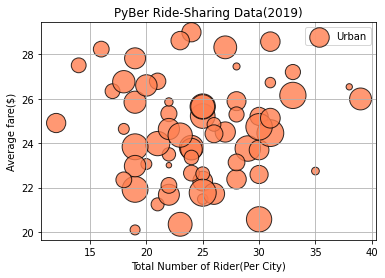

In [112]:
# To the plt.scatter() function, let's add the x- and y-axis data, where the x-axis is the urban_ride_count and the y-axis is the urban_avg_fare.
# alpha - for shade (20%)
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,label="Urban",color="coral", s= [urban_driver_count*10], edgecolors= "black",linewidths= 1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data(2019)")
plt.legend()
plt.xlabel("Total Number of Rider(Per City)")
plt.ylabel("Average fare($)")
plt.grid(True)
plt.show()

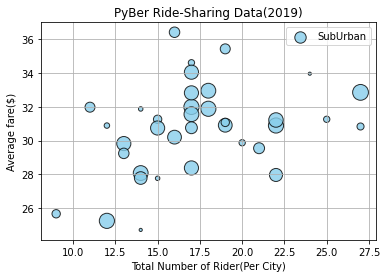

In [113]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,label="SubUrban",color="skyblue", s= suburban_driver_count*10, edgecolors= "black",linewidths= 1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data(2019)")
plt.legend()
plt.xlabel("Total Number of Rider(Per City)")
plt.ylabel("Average fare($)")
plt.grid(True)
plt.show()

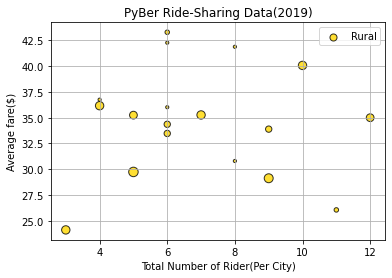

In [114]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare,label="Rural",color="gold", s= rural_driver_count*10, edgecolors= "black",linewidths= 1,alpha=0.8)
plt.title("PyBer Ride-Sharing Data(2019)")
plt.legend()
plt.xlabel("Total Number of Rider(Per City)")
plt.ylabel("Average fare($)")
plt.grid(True)
plt.show()

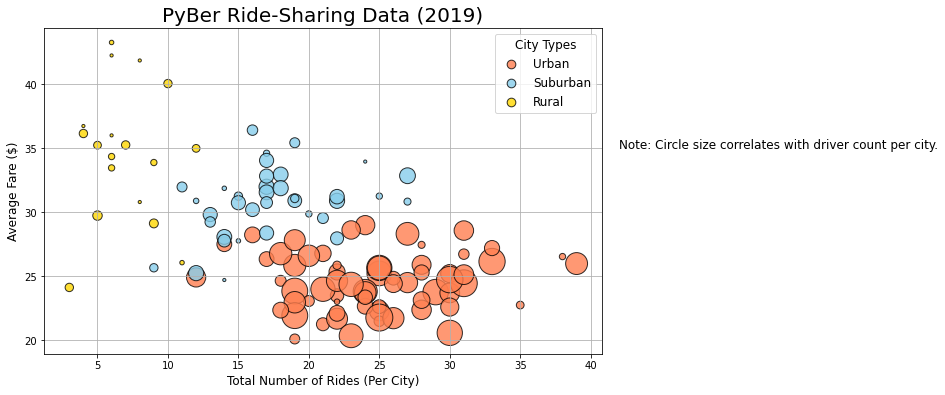

<Figure size 432x288 with 0 Axes>

In [121]:
# Next, we will combine these three charts into one chart.
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
    
# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
plt.show()
# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [122]:
# How to adjust legend size
# The markers in the legend have different sizes, which are automatically determined based on the average size of the marker. 
# Therefore, we'll need to customize the legend to scale them to the same size.
# We can declare a variable for the legend function, lgnd = plt.legend(), 
# and add parameters for font size, legend location, and legend title, along with some other features.
# After we declare the variable for the legend, we can use legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size. 
# Inside the brackets, we can add the list element for the number of markers in the legend.

In [ ]:
# we should add some statistical analysis because it will help us demonstrate the relevance of the data, especially the number of rides for each city. 
#  This will help the compnay make decisions about which types of cities need more driver support.
# We'll use and compare the following three ways to calculate the summary statistics:

# The Pandas describe() function on the DataFrame or Series.
# The Pandas mean(), median(), and mode() methods on a Series.
# # The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

In [123]:
# Get summary statistics. Urban
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [125]:
# Get summary statistics. suburban
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [126]:
# Get summary statistics. rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


Now let's calculate the summary statistics of the ride count for each city type. 

In [127]:
# Get summary statistics. URBAN
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [128]:
# Get summary statistics.SUBURBAN
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [129]:
# Get summary statistics.Rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

Pandas mean(), median(), and mode() Methods

In [130]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [131]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [132]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

NumPy mean() and median() Functions and SciPy mode() Function

In [133]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [134]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [138]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [139]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


calculate the summary statistics for the average fares for each city type.

In [141]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [142]:
# Get the fares for the suburban,rural cities.
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [147]:
# Calculate the measures of central tendency for the ride count for the rural cities.
# Mean calculation
mean_urban_fares = np.mean(urban_fares)
print("MEAN FARE COUNTS FOR EACH CITY TYPE:")
print(f"The mean for the fare counts for Urban trips is {mean_urban_fares:.2f}.")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the fare counts for subrban trips is {mean_suburban_fares:.2f}.")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the fare counts for rural trips is {mean_rural_fares:.2f}.")
print("")

# Calculate the measures of central tendency for the ride count for the rural cities.
# Median calculation
print("MEDIAN FARE COUNTS FOR EACH CITY TYPE:")
median_urban_fares = np.median(urban_fares)
print(f"The median for the fare counts for urban trips is {median_urban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median for the fare counts for suburban trips is {median_suburban_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median for the fare counts for rural trips is {median_rural_fares:.2f}.")
print("")


# Calculate the measures of central tendency for the ride count for the rural cities.
# Mode calculation
print("MODE OF FARE COUNTS FOR EACH CITY TYPE:")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the fare counts for urban trips is {mode_urban_fares}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the fare counts for suburban trips is {mode_suburban_fares}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the fare counts for rural trips is {mode_rural_fares}.")
print("")

MEAN FARE COUNTS FOR EACH CITY TYPE:
The mean for the fare counts for Urban trips is 24.53.
The mean for the fare counts for subrban trips is 30.97.
The mean for the fare counts for rural trips is 34.62.

MEDIAN FARE COUNTS FOR EACH CITY TYPE:
The median for the fare counts for urban trips is 24.64.
The median for the fare counts for suburban trips is 30.75.
The median for the fare counts for rural trips is 37.05.

MODE OF FARE COUNTS FOR EACH CITY TYPE:
The mode for the fare counts for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mode for the fare counts for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mode for the fare counts for rural trips is ModeResult(mode=array([37.05]), count=array([2])).



Summary Statistics for the Number of Drivers by City Type

In [152]:
# Get the DRIVER COUNTS for each city type
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [155]:
# Calculate the measures of central tendency for the DRIVER count for all city types
# Mean calculation
mean_urban_drivers = np.mean(urban_drivers)
print("MEAN drivercount COUNTS FOR EACH CITY TYPE:")
print(f"The mean for the drivercount counts for Urban trips is {mean_urban_drivers:.0f}.")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the drivercount counts for subrban trips is {mean_suburban_drivers:.0f}.")
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the drivercount counts for rural trips is {mean_rural_drivers:.0f}.")
print("")


# Median calculation
print("MEDIAN drivercount COUNTS FOR EACH CITY TYPE:")
median_urban_drivers = np.median(urban_drivers)
print(f"The median for the drivercount counts for urban trips is {median_urban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the drivercount counts for suburban trips is {median_suburban_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median for the drivercount counts for rural trips is {median_rural_drivers:.0f}.")
print("")



# Mode calculation
print("MODE OF drivercount COUNTS FOR EACH CITY TYPE:")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the drivercount counts for urban trips is {mode_urban_drivers}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the drivercount counts for suburban trips is {mode_suburban_drivers}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the drivercount counts for rural trips is {mode_rural_drivers}.")
print("")

MEAN drivercount COUNTS FOR EACH CITY TYPE:
The mean for the drivercount counts for Urban trips is 37.
The mean for the drivercount counts for subrban trips is 14.
The mean for the drivercount counts for rural trips is 4.

MEDIAN drivercount COUNTS FOR EACH CITY TYPE:
The median for the drivercount counts for urban trips is 37.
The median for the drivercount counts for suburban trips is 16.
The median for the drivercount counts for rural trips is 4.

MODE OF drivercount COUNTS FOR EACH CITY TYPE:
The mode for the drivercount counts for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mode for the drivercount counts for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mode for the drivercount counts for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).



Create Box-and-Whisker Plots


In [156]:
# Box-and-whisker plots are an effective way to show a lot of information about distribution in a small amount of space, 
# especially outliers.
urban_ride_count


city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

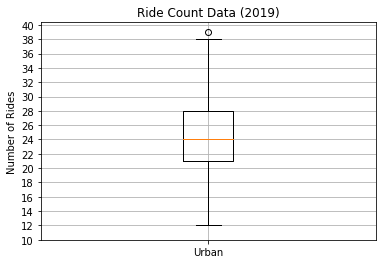

In [157]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

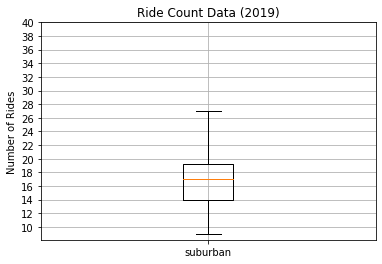

In [158]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

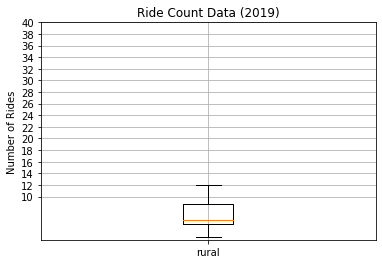

In [159]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

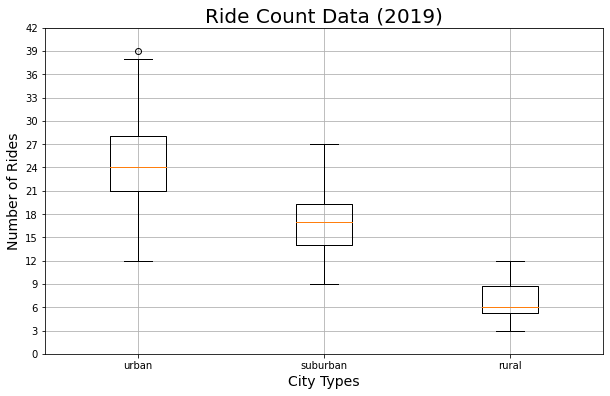

<Figure size 432x288 with 0 Axes>

In [168]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["urban","suburban","rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
# Add the title, x-axis label,x-axis label, set font size
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels= x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

Get the outlier city

In [169]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Box-and-Whisker Plots for Ride Fare Data

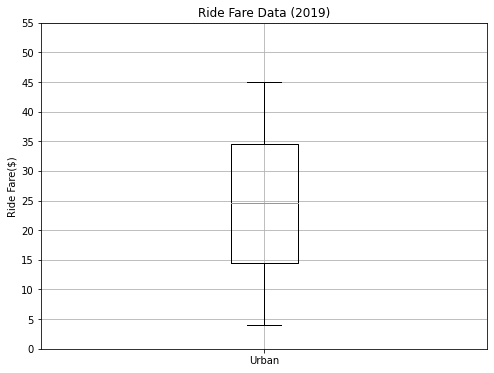

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [182]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Ride Fare($)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

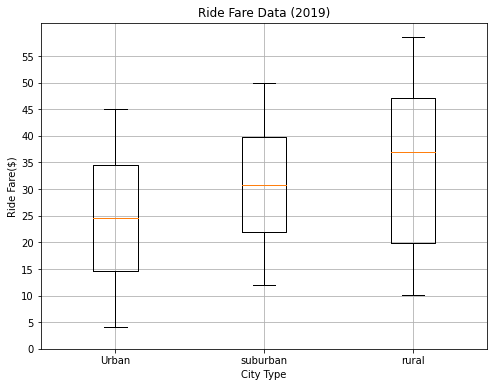

In [189]:
# Create a box-and-whisker plot for the ride fare.
x_labels = ["Urban","suburban","rural"]
fare_count_data =[urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(fare_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Ride Fare($)')
ax.set_xlabel("City Type")
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()

Box-and-Whisker Plots for Driver Count Data

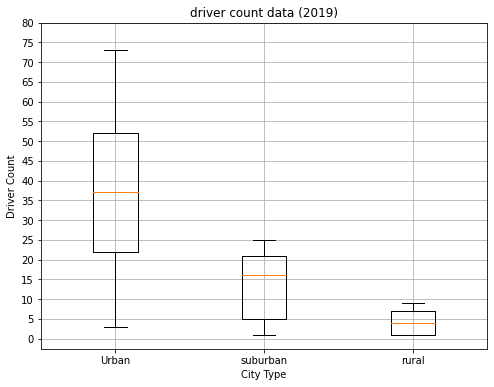

In [188]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","suburban","rural"]
driver_count_data =[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(driver_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('driver count data (2019)')
ax.set_ylabel('Driver Count')
ax.set_xlabel("City Type")
ax.set_yticks(np.arange(0, 85, step=5.0))
ax.grid()
plt.show()

creating a pie chart that showcases the percentage of fares for each type of city.

In [ ]:
# To create this pie chart, we will need to do the following:

# Get the total fares for each city type.
# Get the total for all the fares for all the city types.
# Calculate the percentage of the total fares for each city type.

In [191]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [207]:
# Get the total fares for each city type.
total_urban_fares = urban_cities_df["fare"].sum()
total_suburban_fares = suburban_cities_df["fare"].sum()
total_rural_fares = rural_cities_df["fare"].sum()
total_fares = pyber_data_df["fare"].sum()
urban_fare_percentage = total_urban_fares / total_fares *100
suburban_fare_percentage = total_suburban_fares / total_fares *100
rural_fare_percentage = total_rural_fares / total_fares *100


print(f'The total urban fares is  {total_urban_fares}.')
print(f'The total suburban fares is {total_suburban_fares}.')
print(f'The total rural fares is  {total_rural_fares}.')
print (f'The total fares for all cities is {total_fares}.')
print (f'The total urban fare percentage  is {urban_fare_percentage}%.')
print (f'The total suburban fare percentage  is {suburban_fare_percentage}%.')
print (f'The total rural fare percentage  is {rural_fare_percentage}%.')




The total urban fares is  39854.380000000005.
The total suburban fares is 19356.33.
The total rural fares is  4327.929999999999.
The total fares for all cities is 63538.64.
The total urban fare percentage  is 62.72463496228438%.
The total suburban fare percentage  is 30.46387206273222%.
The total rural fare percentage  is 6.81149297498341%.


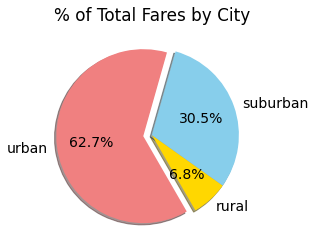

In [235]:
# company's color scheme of gold, sky blue, and coral.
type_percents =[rural_fare_percentage, suburban_fare_percentage,urban_fare_percentage ]
plt.pie(type_percents, colors=["gold", "skyblue","lightcoral"],labels=["rural","suburban","urban"], explode= [0,0,0.1], shadow= True,autopct='%1.1f%%',startangle=300)
plt.title("% of Total Fares by City")

plt.show()

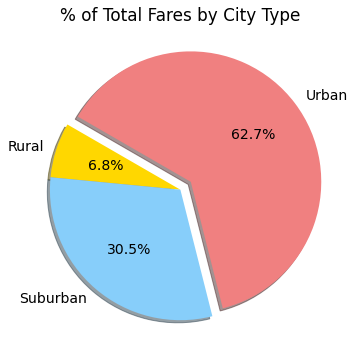

In [236]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()